# What Are Leading Causes For Disparity in Voter Turnout in Washington?

## Team 20:
**- Tufei Cai**

**- Clarice Fun**

**- Piero Dorian Trujillo**

**- Johnny Tiger Wei**

##  Abstract:

We investigate the disparities in voter turnout rates among different racial and ethnic groups in the state of Washington. Our study aims to gain insights into the underlying causes of these disparities and develop effective strategies to promote greater voter participation. 
Our research analyzes data from three different lenses of study, including lifestyle factors, ethnic background, and housing value. Interests in hobbies (such as culinary, travel, and photography), individuals of European and Asian descent, and people in affluent areas are linked to higher voter participation rates. Conversely, black and Hispanic populations, who are heavily concentrated in median to lower valued housing areas, have comparatively lower voting rates. The study recommends the need for policymakers to address the factors that negatively impact voter turnout in these areas and promote greater diversity and inclusion in the democratic process.

## Introduction: 

To have a successful democratic system, people need to actively participate and engage in the process. With the growing diversity of the United States, policymakers are paying more attention to how race affects democracy. In the 2020 Presidential election, we see that voter turnout rates varied significantly among different racial groups. For example, White Americans had a turnout rate of 66.8%, while Black Americans had a turnout rate of only 59.9%, Hispanic/Latino Americans had a turnout rate of 53.7%, and Asian Americans had a turnout rate of 45.6%.

Despite these disparities, the reasons for them are not yet fully understood. To gain a deeper understanding and develop effective solutions, a comprehensive analysis of relevant data is necessary. In our research, we have chosen to focus on the state of Washington to investigate this issue further.

## Background:

Using the US’s national voter file from the center for antiracist research at BU, we dive into segments of voters' lifestyles, race, affluence, and interests, and see how different levels of income, interests in hobbies, and even county wealth, may affect voter turnouts in the state of Washington.



## Aims:

Our goal is to investigate whether there is a disparity in the number of voting stations between affluent and less affluent areas/counties, and if so, what may be the leading causes for this disparity. Another important aspect of the research is to identify disparities in interests and lifestyle factors such as leisure activities, sports, arts, and travel, that may impact voter turnout among different ethnic groups. Ultimately, the goal is to gain insights into the underlying causes of disparities in voter turnout and use this information to develop effective strategies to promote greater voter engagement and participation in the democratic process. We divide this research into three unique specific questions and analyze each of them independently of each other.

## Data Description:

The center for antiracist
research (CAR) at BU has a national voter file for the US. The voter files contain records
for every registered voter in the US. A voter files exists for each state. Each file contains
geographic, demographic and household information. It also contains the history of voting for
each registered voter.

## Research Question:

#### What affects voter turnout in Washington?

- **Is there a disparity in the number of voting stations between affluent areas and less affluent areas/counties?**

- **What are leading causes for disparity in turnout for voters of different ethnicity?**

- **What are some of the disparities in interests/lifestyle (leisure activity, sports, arts, travel etc.) that impact voter turnout?**

# Exploratory Data Analysis:

## Data Importation:

In [3]:
# create a SparkSession object
spark = SparkSession.builder.appName("ReadTabFileExample").getOrCreate()
datapath = "gs://pstat135-tc/VM2Uniform--WA--2020-12-09.tab" # Change the Bucket Number and Path

In [4]:
# Importing Data
df = spark.read\
.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("delimiter", "\t")\
.option("inferSchema", "true")\
.load(datapath)

In [5]:
columnNames = ['Voters_Active','County','City', 'CommercialData_EstimatedAreaMedianHHIncome', 'CommercialData_EstimatedHHIncome', 'CommercialData_AreaMedianHousingValue']
df2 = df.select(columnNames)

In [6]:
df_pandas = df2.toPandas() # Converting sql.dataframe to pandas dataframe

In [7]:
df_pandas.columns = ['Voter_Active','County','City','Area_Median_Income','Estimated_Income','Area_Median_Housing_Value']

In [8]:
df_pandas.head(10)

,Voter_Active,County,City,Area_Median_Income,Estimated_Income,Area_Median_Housing_Value
0,I,ADAMS,None,$101859,$25000-34999,$385836
1,I,ADAMS,OTHELLO,$59499,$50000-74999,$146204
2,I,ADAMS,OTHELLO,$59499,$50000-74999,$146204
3,I,ADAMS,RITZVILLE,$72954,$150000-174999,$146801
4,I,ADAMS,RITZVILLE,None,$50000-74999,None
5,I,ADAMS,RITZVILLE,None,$50000-74999,None
6,I,ADAMS,RITZVILLE,None,None,None
7,I,ADAMS,None,$75367,$75000-99999,$288332
8,I,ADAMS,None,$70124,$50000-74999,$173863
9,I,ADAMS,None,$75367,$75000-99999,$288332


## Data Manipulation:

In [9]:
# Importing Packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
county_counts = df_pandas.pivot_table(index="County", columns="Voter_Active", aggfunc="size", fill_value=0)

# compute the total number of voters
county_totals = county_counts.sum(axis=1)

# compute the percentage of active
pct_active = county_counts["A"]/county_totals

result = pd.concat([county_counts, county_totals, pct_active], axis=1, keys=["Active", "Inactive", "Total", "Pct Active"])
result.index.name = "County"
result.columns = ['Active','Inactive','Total Voters','Percentage of Active']

In [11]:
result.reset_index(inplace=True)
result.head(5)

,County,Active,Inactive,Total Voters,Percentage of Active
0,ADAMS,7422,429,7851,0.945357
1,ASOTIN,14132,1982,16114,0.877001
2,BENTON,119968,8190,128158,0.936095
3,CHELAN,48922,2763,51685,0.946542
4,CLALLAM,55253,2963,58216,0.949103


> The data frame is showing the total turnout rates for active and inactive voters. Likewise, the data frame also depicts the percentage of active voters in each county.

In [12]:
least_active_counties = result.sort_values(by='Percentage of Active', ascending=True).head(10)  # Top 10 counties have lowest active percentage
least_active_counties

,County,Active,Inactive,Total Voters,Percentage of Active
1,ASOTIN,14132,1982,16114,0.877001
25,PEND OREILLE,9895,1086,10981,0.901102
37,WHITMAN,23732,2601,26333,0.901227
11,GARFIELD,1654,174,1828,0.904814
12,GRANT,45262,3673,48935,0.924941
22,MASON,42232,3161,45393,0.930364
26,PIERCE,541731,40301,582032,0.930758
33,THURSTON,190613,13948,204561,0.931815
35,WALLA WALLA,35802,2613,38415,0.931980
7,COWLITZ,69738,5008,74746,0.933000


> The data frame shows the counties that have lowest active rate in Washington

In [13]:
most_active_counties = result.sort_values(by='Percentage of Active', ascending=False).head(10)  # Top 10 counties have lowest active percentage
most_active_counties

,County,Active,Inactive,Total Voters,Percentage of Active
29,SKAMANIA,8445,236,8681,0.972814
19,KLICKITAT,15520,680,16200,0.958025
27,SAN JUAN,14127,625,14752,0.957633
16,KING,1371587,61758,1433345,0.956913
21,LINCOLN,7753,377,8130,0.953629
28,SKAGIT,82372,4011,86383,0.953567
23,OKANOGAN,25006,1299,26305,0.950618
38,YAKIMA,124440,6515,130955,0.950250
14,ISLAND,59554,3193,62747,0.949113
4,CLALLAM,55253,2963,58216,0.949103


> The data frame shows the counties that have highest active rate in Washington

## Data Visualization:

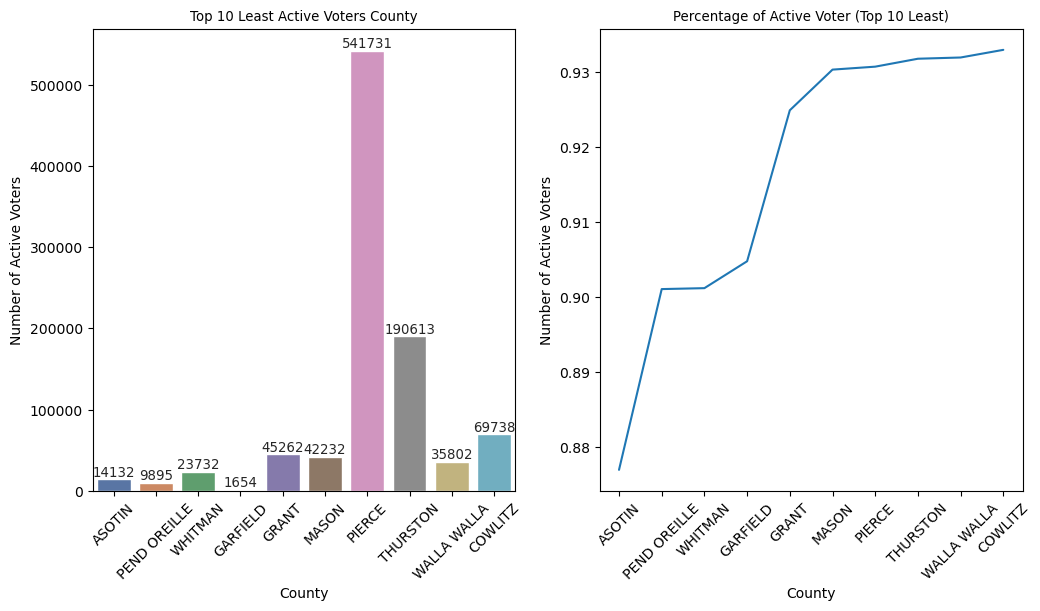

In [14]:
figure, axis = plt.subplots(1, 2,figsize=(12, 6))

sns.set(font_scale=0.8)
ax_1 = sns.barplot(data=least_active_counties, x="County", y="Active", ax = axis[0])
plt.setp(ax_1.get_xticklabels(), rotation=45)
ax_1.bar_label(ax_1.containers[0])
ax_1.set_ylabel("Number of Active Voters")
ax_1.set_xlabel("County")
ax_1.set_title("Top 10 Least Active Voters County")

sns.set(font_scale=0.8)
ax1 = sns.lineplot(data=least_active_counties, x="County", y="Percentage of Active", ax = axis[1])
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel("Number of Active Voters")
ax1.set_xlabel("County")
ax1.set_title("Percentage of Active Voter (Top 10 Least)")
plt.show()

> **Graph 1** The Top 10 Counties With the Lowest Active Voter Rates and the Percentage of Active Voters For Each County

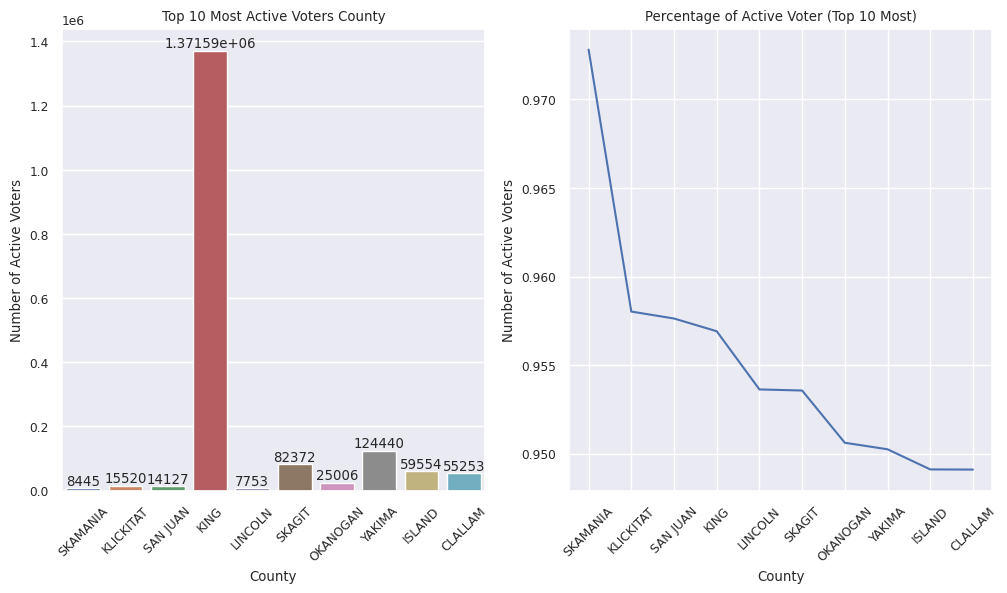

In [15]:
figure, axis1 = plt.subplots(1, 2,figsize=(12, 6))

sns.set(font_scale=0.8)
ax_2 = sns.barplot(data=most_active_counties, x="County", y="Active", ax = axis1[0])
plt.setp(ax_2.get_xticklabels(), rotation=45)
ax_2.bar_label(ax_2.containers[0])
ax_2.set_ylabel("Number of Active Voters")
ax_2.set_xlabel("County")
ax_2.set_title("Top 10 Most Active Voters County")

sns.set(font_scale=0.8)
ax2 = sns.lineplot(data=most_active_counties, x="County", y="Percentage of Active", ax = axis1[1])
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_ylabel("Number of Active Voters")
ax2.set_xlabel("County")
ax2.set_title("Percentage of Active Voter (Top 10 Most)")

plt.show()

> **Graph 2** Top 10 Counties With the Highest Active Voter Rates and the Percentage of Active Voters For Each County

# Is there a disparity in the number of voting stations between affluent areas and less affluent areas/counties?

Affluence refers to a financial advantage over others, and it can be measured through income or wealth. In the dataset, area median income and state income decile are features that are related to income, while area median housing value is a feature that is realted to wealth. 

By aggregating the number of active and inactive voters for areas with the same area median income, area median housing value and state income decile, we have obtained the percentage of active voters for the respective area values.


### Data Cleaning:

In [16]:
columnNames = ['Voters_Active','County','City', 'CommercialData_EstimatedAreaMedianHHIncome', 'CommercialData_EstimatedHHIncome', 'CommercialData_AreaMedianHousingValue', 'CommercialData_StateIncomeDecile']
df5 = df.select(columnNames)

df_pandas_5 = df5.toPandas() # Converting to pandas df

In [24]:
df_pandas_5.columns =  ['Voter_Active','County','City','Area_Median_Income','Estimated_Income','Area_Median_Housing_Value', 'State_Income_Decile']

In [25]:
df_pandas_5.head(5)

,Voter_Active,County,City,Area_Median_Income,Estimated_Income,Area_Median_Housing_Value,State_Income_Decile
0,I,ADAMS,None,$101859,$25000-34999,$385836,6.0
1,I,ADAMS,OTHELLO,$59499,$50000-74999,$146204,1.0
2,I,ADAMS,OTHELLO,$59499,$50000-74999,$146204,1.0
3,I,ADAMS,RITZVILLE,$72954,$150000-174999,$146801,3.0
4,I,ADAMS,RITZVILLE,None,$50000-74999,None,NaN


In [18]:
area_income_counts = df_pandas.pivot_table(index="Area_Median_Income", columns="Voter_Active", aggfunc="size", fill_value=0)

# compute the total number of voters
area_income_totals = area_income_counts.sum(axis=1)

# compute the percentage of active
pct_active_income = area_income_counts["A"]/area_income_totals

area_income_result = pd.concat([area_income_counts, area_income_totals, pct_active_income], axis=1, keys=["Active", "Inactive", "Total", "Pct Active"])
area_income_result.index.name = "Area Median Income"
area_income_result.columns = ['Active','Inactive','Total Voters','Percentage of Active']
area_income_result.reset_index(inplace=True)

# convert currency to integer
area_income_result["Area Median Income"] = area_income_result["Area Median Income"].replace('[\$,]', '', regex=True)
area_income_result["Area Median Income"] = pd.to_numeric(area_income_result["Area Median Income"])

In [19]:
area_income_result.head(5)

,Area Median Income,Active,Inactive,Total Voters,Percentage of Active
0,0,17,1,18,0.944444
1,100120,928,36,964,0.962656
2,100132,1170,39,1209,0.967742
3,100173,874,26,900,0.971111
4,100213,1130,100,1230,0.918699


> The dataframe shows the median income in the area along with the percentage of active voters in the area.

In [20]:
area_value_counts = df_pandas.pivot_table(index="Area_Median_Housing_Value", columns="Voter_Active", aggfunc="size", fill_value=0)

# compute the total number of voters
area_value_totals = area_value_counts.sum(axis=1)

# compute the percentage of active
pct_active_value = area_value_counts["A"]/area_value_totals

area_value_result = pd.concat([area_value_counts, area_value_totals, pct_active_value], axis=1, keys=["Active", "Inactive", "Total", "Pct Active"])
area_value_result.index.name = "Area Median Housing Value"
area_value_result.columns = ['Active','Inactive','Total Voters','Percentage of Active']
area_value_result.reset_index(inplace=True)

# convert currency to integer
area_value_result["Area Median Housing Value"] = area_value_result["Area Median Housing Value"].replace('[\$,]', '', regex=True)
area_value_result["Area Median Housing Value"] = pd.to_numeric(area_value_result["Area Median Housing Value"])

In [21]:
area_value_result.head(5)

,Area Median Housing Value,Active,Inactive,Total Voters,Percentage of Active
0,0,785,205,990,0.792929
1,101171,400,33,433,0.923788
2,101562,525,94,619,0.848142
3,101666,988,75,1063,0.929445
4,101922,355,38,393,0.903308


> The dataframe shows the median housing value in the area along with the percentage of active voters in the area.

In [26]:
state_value_counts = df_pandas_5.pivot_table(index="State_Income_Decile", columns="Voter_Active", aggfunc="size", fill_value=0)

# compute the total number of voters
state_value_totals = state_value_counts.sum(axis=1)

# compute the percentage of active
pct_active_state = state_value_counts["A"]/state_value_totals

state_value_result = pd.concat([state_value_counts, state_value_totals, pct_active_state], axis=1, keys=["Active", "Inactive", "Total", "Pct Active"])
state_value_result.index.name = "State Income Decile"
state_value_result.columns = ['Active','Inactive','Total Voters','Percentage of Active']
state_value_result.reset_index(inplace=True)

In [28]:
state_value_result.head(5)

,State Income Decile,Active,Inactive,Total Voters,Percentage of Active
0,0.0,357615,37493,395108,0.905107
1,1.0,409399,31229,440628,0.929126
2,2.0,437143,29236,466379,0.937313
3,3.0,457329,27687,485016,0.942915
4,4.0,459293,24749,484042,0.948870


> The dataframe shows the state income decile in the area along with the percentage of active voters in the area.

### Data Visualization:

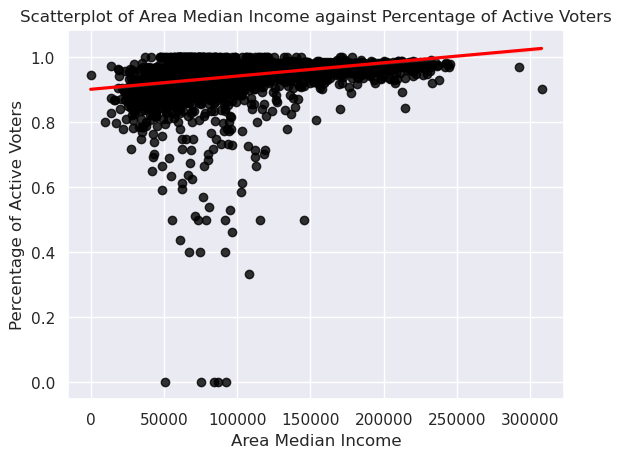

In [85]:
ax_4 = sns.regplot(x="Area Median Income",
                    y="Percentage of Active",
                    data=area_income_result,
                    scatter_kws={"color": "black"}, line_kws={"color": "red"})

ax_4.set_ylabel("Percentage of Active Voters")
ax_4.set_xlabel("Area Median Income")
ax_4.set_title("Scatterplot of Area Median Income against Percentage of Active Voters")

plt.show()

> The scatterplot of area median income against percentage of active voters shows the relationship between area median income and percentage of active voters. As the area median income increases, the percentage of active voters increases. There is a slight positive correlation between area median income and percentage of active voters. 

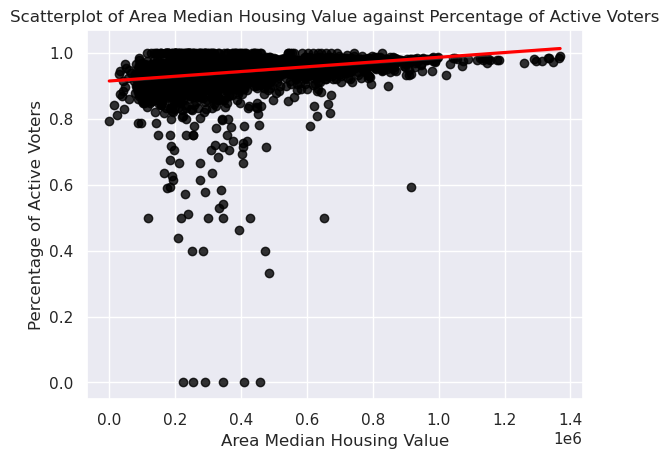

In [86]:
ax_5 = sns.regplot(x="Area Median Housing Value",
                    y="Percentage of Active",
                    data=area_value_result,
                    scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax_5.set_ylabel("Percentage of Active Voters")
ax_5.set_xlabel("Area Median Housing Value")
ax_5.set_title("Scatterplot of Area Median Housing Value against Percentage of Active Voters")

plt.show()

> The scatterplot of area median housing value against percentage of active voters shows the relationship between area median housing value and percentage of active voters. As the area median housing value increases, the percentage of active voters increases. There is a slight positive correlation between area median housing value and percentage of active voters. 

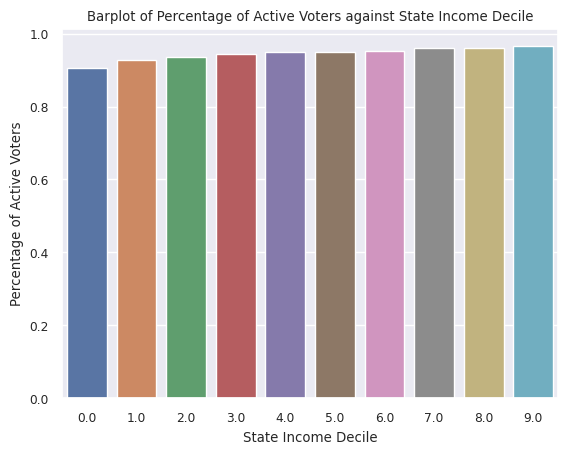

In [29]:
ax_6 = sns.barplot(x="State Income Decile",
                    y="Percentage of Active",
                    data=state_value_result)
ax_6.set_ylabel("Percentage of Active Voters")
ax_6.set_xlabel("State Income Decile")
ax_6.set_title("Barplot of Percentage of Active Voters against State Income Decile")

plt.show()

> The barplot of state income decile against percentage of active voters shows the percentage of active voter for each value of state income decile (0-9). As the state income decile increases, the percentage of active voters increases. There is a slight positive correlation between state income decile and percentage of active voters.

### Analysis:

Those who live in more affluent areas tend to have higher socio-economic status, and are likely feel like they have more at stake in terms of taxes, public services and various benefits.
People with lower incomes are more likely to feel disillusioned, because they tend to feel like policy never changes.
However, correlation does not mean causation and hence such interpretations may not be factually correct.

# What are some of the disparities in interests/lifestyle (leisure activity, sports, arts, travel etc.) that impact voter turnout?Is there a disparity in the number of voting stations between affluent areas and less affluent areas/counties?

The question at hand focuses on exploring the relationship between disparities in interests and lifestyle and voter turnout. Specifically, the question seeks to investigate whether there are differences in voter turnout between individuals with different leisure activities, sports interests, artistic inclinations, or travel habits. Additionally, the question aims to examine whether there is a disparity in the number of voting stations between areas that differ in affluence.

The dataset likely includes variables related to individuals' interests and lifestyle habits, such as the types of leisure activities they enjoy, the sports they participate in, the arts they engage with, or the frequency of their travel. Other variables may include demographic information, such as age, gender, or education level, which may also impact voter turnout.

### Data Cleaning:

In [24]:
cl = ['Voters_Active','County','City','CommercialData_Education','CommercialData_AreaMedianEducationYears']
df3 = df.select(cl)

In [25]:
cl2 = ['Voters_Active','CommercialDataLL_Interest_in_Cooking_General_In_Household','CommercialDataLL_Interest_in_Electronic_Gaming_In_Household','CommercialDataLL_Interest_in_Gaming_Casino_In_Household','CommercialDataLL_Interest_in_Photography_In_Household','CommercialDataLL_Interest_in_SpectatorSports_Auto_Racing_In_Household','CommercialDataLL_Interest_in_Musical_Instruments_In_Household','CommercialDataLL_Interest_in_Travel_International_In_Household','CommercialDataLL_Interest_in_Smoking_In_Household']
df4 = df.select(cl2)
df4 = df4.withColumnRenamed("CommercialDataLL_Interest_in_Cooking_General_In_Household", "Culinary")\
    .withColumnRenamed("CommercialDataLL_Interest_in_Electronic_Gaming_In_Household", "Video Games")\
    .withColumnRenamed("CommercialDataLL_Interest_in_Gaming_Casino_In_Household", "Casino")\
    .withColumnRenamed("CommercialDataLL_Interest_in_Photography_In_Household", "Photography")\
    .withColumnRenamed("CommercialDataLL_Interest_in_SpectatorSports_Auto_Racing_In_Household", "Auto Racing")\
    .withColumnRenamed("CommercialDataLL_Interest_in_Musical_Instruments_In_Household", "Musical Instruments")\
    .withColumnRenamed("CommercialDataLL_Interest_in_Smoking_In_Household", "Smoking")\
    .withColumnRenamed("CommercialDataLL_Interest_in_Travel_International_In_Household", "Travel")

In [23]:
df4_panda = df4.toPandas()

### Data Example:

In [27]:
display_template = df4_panda[(df4_panda['Casino'] == 'Yes') & (df4_panda['Smoking'] == 'Yes')] # Display Dataset

In [28]:
display_template.head(5).reset_index(drop = True) # Data Example

,Voters_Active,Culinary,Video Games,Casino,Photography,Auto Racing,Musical Instruments,Travel,Smoking
0,A,Yes,None,Yes,Yes,Yes,None,None,Yes
1,A,Yes,None,Yes,Yes,Yes,None,None,Yes
2,A,Yes,None,Yes,None,Yes,None,None,Yes
3,A,None,None,Yes,None,None,None,None,Yes
4,A,Yes,None,Yes,Yes,None,None,None,Yes


> **Data_Interest/lifestyle:** We choose some of the most popular interest or lifestyle which are culinary, video games, casino, photography, auto racing, musical instruments, travel, and smoking.

### Machine Learning Process:

The machine learning algorithm we choose is random forest. Seems there are a lot of missing values and random forest can handle missing values directly. Also, random forest is a good tool for classification.

In [29]:
# Convert Yes and No to 1 and 0
df_ml = pd.get_dummies(df4_panda, columns=['Culinary','Video Games','Casino', 'Photography','Auto Racing','Musical Instruments','Travel', 'Smoking'], prefix='', prefix_sep='')

In [30]:
# Import machine learning library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split train and test data set
X_train, X_test, y_train, y_test = train_test_split(df_ml.iloc[:, 1:], df_ml.iloc[:, 0], test_size=0.2, random_state=42)

In [31]:
# Fit the model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [32]:
# Evaluating Model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='A')
recall = recall_score(y_test, y_pred, pos_label='A')
f1 = f1_score(y_test, y_pred, pos_label='A')

In [33]:
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

Accuracy: 0.9440242819249105, Precision: 0.9440242819249105, Recall: 1.0, F1-score: 0.9712062659939288


> **The Accuracy of the model is 94%**

In [34]:
importances = rf.feature_importances_
feature_names = ['Culinary','Video Games','Casino', 'Photography','Auto Racing','Musical Instruments','Travel', 'Smoking']
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

In [35]:
feature_importances

,Feature,Importance
0,Culinary,0.634806
6,Travel,0.130571
3,Photography,0.107399
5,Musical Instruments,0.041900
1,Video Games,0.026053
2,Casino,0.022358
4,Auto Racing,0.019221
7,Smoking,0.017692


> **Feature_Importances:** This data set shows the importances of random forest that applied to the target dataset

### Data Visualization:

In [36]:
df_ml = df_ml.set_axis(['Voter_Active','Culinary','Video Games','Casino', 'Photography','Auto Racing','Musical Instruments','Travel', 'Smoking'], axis=1, inplace=False)

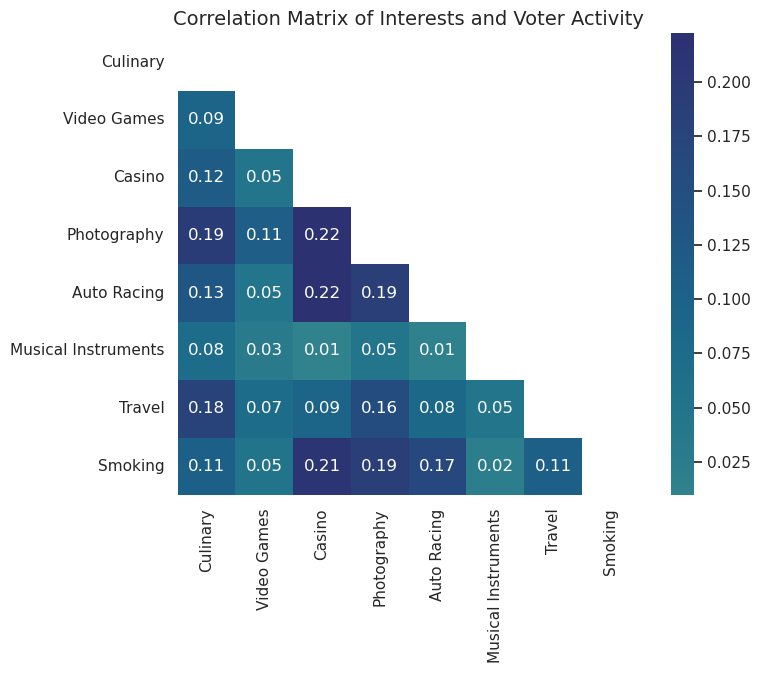

In [37]:
# Compute the correlation matrix
corr_matrix = df_ml.corr()

# Create a heatmap
sns.set(style='white')

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, cmap='crest', center=0, square=True, annot=True, annot_kws={"size": 12}, fmt=".2f")
plt.title('Correlation Matrix of Interests and Voter Activity', fontsize=14)

plt.show()

> **Correlation Matrix of Interests and Voter Activity:** This data visualization shows the pairwise correlation coefficients between variables in the target dataset

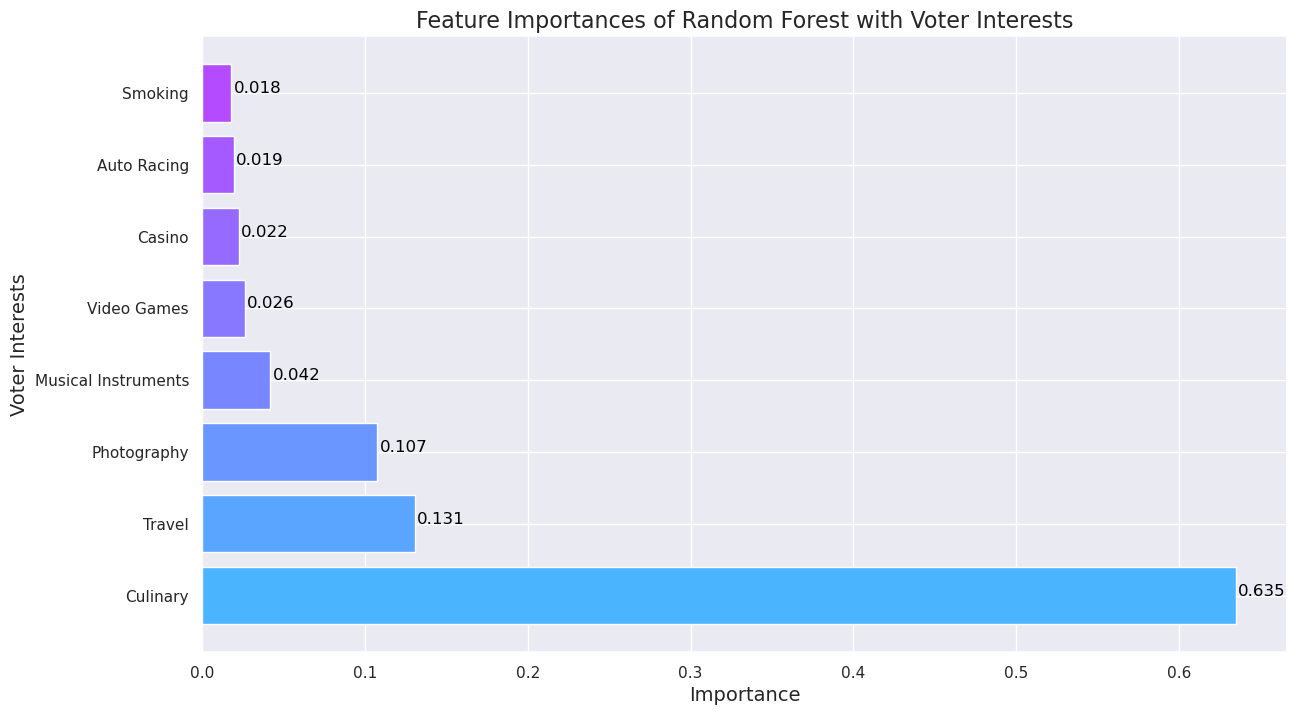

In [38]:
# Data Visualization
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,8))

# Change color to rainbow
cmap = plt.cm.get_cmap('cool', len(feature_names) + 10)
colors = cmap(np.arange(len(feature_names) + 10))
colors = colors[5:]

# Make the bar chart
ax.barh(feature_importances['Feature'], feature_importances['Importance'], align='center', color=colors)
ax.set_xlabel('Importance',fontsize = 14)
ax.set_ylabel('Voter Interests',fontsize = 14)
ax.set_title('Feature Importances of Random Forest with Voter Interests', fontsize = 16)

# Add labels
for i, v in enumerate(feature_importances['Importance']):
    ax.text(v+0.0015, i, str(round(v, 3)), color='black')

plt.show()

> **Feature Importances of Random Forest with Voter Interests:** This plot shows the highest importances that related to the dataset

### Analysis:

Based on our analysis of the dataset, we have found that there are specific interests and lifestyle habits that may impact voter turnout in Washington.
Our data visualization showed that culinary, travel, and photography interests are positively correlated with voter turnout, indicating that voters with these interests are more likely to be active in elections.

Additionally, we discovered that the highest correlation between variables are casino and auto racing or photography. This suggests that voters interested in both casinos and auto racing or photography are more likely to be active voters.

This finding suggests that targeting individuals with these interests and lifestyle may be an effective strategy for increasing voter turnout. For example, voter registration drives could be held at food festivals or travel expos,
or political campaigns could use social media platforms like Instagram to engage with voters interested in culinary or photography.

Overall, these findings provide valuable insights for political campaigns and organizations to better understand and target potential voters in Washington.
By tailoring their outreach efforts to specific interests and lifestyle habits, they may be able to increase voter participation and engagement in future elections.

# What are the leading causes for the disparity in turnout among voters of different ethnicities?

### Data Cleaning:

In [43]:
# Import packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

from pyspark.sql.functions import isnull, isnan, when, count

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import regexp_replace, col

from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.feature import StringIndexer

from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

from pyspark.ml.evaluation import BinaryClassificationEvaluator

import pyspark.sql.functions as F
import matplotlib.pyplot as plt

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.mllib.evaluation import MulticlassMetrics

from pyspark.ml.feature import RFormula
from pyspark.ml.classification import LogisticRegression

In [32]:
best_columns = ['Voters_Active', 'County','CommercialData_EstimatedHHIncomeAmount','CommercialData_AreaMedianHousingValue', 'Voters_Gender', 'Voters_Age', 'Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc','CommercialData_Education', 'Parties_Description']
df_eth = df.select(best_columns)

In [33]:
# Removing special characters from dataset
df_eth = df_eth.withColumn('CommercialData_AreaMedianHousingValue',regexp_replace(col('CommercialData_AreaMedianHousingValue'), "\\$", ""))
df_eth = df_eth.withColumn('CommercialData_EstimatedHHIncomeAmount',regexp_replace(col('CommercialData_EstimatedHHIncomeAmount'), "\\$", ""))

In [34]:
from pyspark.sql.functions import col
# converting to int
df_eth = df_eth.withColumn('CommercialData_AreaMedianHousingValue', col('CommercialData_AreaMedianHousingValue').cast('int'))
df_eth = df_eth.withColumn('Voters_Age', col('Voters_Age').cast('int'))
df_eth = df_eth.withColumn('CommercialData_EstimatedHHIncomeAmount', col('CommercialData_EstimatedHHIncomeAmount').cast('int'))

In [35]:
from pyspark.sql.functions import col
# converting to string
df_eth = df_eth.withColumn('Voters_Active', col('Voters_Active').cast('string'))
df_eth = df_eth.withColumn('County', col('County').cast('string'))
df_eth = df_eth.withColumn('Voters_Gender', col('Voters_Gender').cast('string'))
df_eth = df_eth.withColumn('Ethnic_Description', col('Ethnic_Description').cast('string'))
df_eth = df_eth.withColumn('EthnicGroups_EthnicGroup1Desc', col('EthnicGroups_EthnicGroup1Desc').cast('string'))
df_eth = df_eth.withColumn('Parties_Description', col('Parties_Description').cast('string'))
df_eth = df_eth.withColumn('CommercialData_Education', col('CommercialData_Education').cast('string'))

In [36]:
from pyspark.sql.functions import when

# Assuming you have a DataFrame called df with a column called 'column_to_replace'
df_eth = df_eth.withColumn('Voters_Active', when(df_eth['Voters_Active'] == 'A', 1).otherwise(0))

In [37]:
df_eth.printSchema()

root
 |-- Voters_Active: integer (nullable = false)
 |-- County: string (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: integer (nullable = true)
 |-- CommercialData_AreaMedianHousingValue: integer (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Voters_Age: integer (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- EthnicGroups_EthnicGroup1Desc: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- Parties_Description: string (nullable = true)



In [38]:
sampled_df = df_eth.sample(fraction=0.01, seed=12) # extract a random 1% sample of rows
pandas_sample_df = sampled_df.toPandas() # convert the resulting PySpark DataFrame to a Pandas DataFrame

In [40]:
# Remove Null Values from Dataset

# visualize missing data
percent_missing = pandas_sample_df.isnull().sum() * 100 / len(pandas_sample_df)
percent_missing

Voters_Active                              0.000000
County                                     0.000000
CommercialData_EstimatedHHIncomeAmount     2.071887
CommercialData_AreaMedianHousingValue      3.720205
Voters_Gender                              0.029969
Voters_Age                                 0.043955
Ethnic_Description                        10.259535
EthnicGroups_EthnicGroup1Desc             10.259535
CommercialData_Education                  40.482708
Parties_Description                        0.000000
dtype: float64

In [41]:
# remove rows with null values
sampled_df = sampled_df.na.drop()

# remove rows with null values
pandas_sample_df = pandas_sample_df.dropna()

# visualize missing data
percent_missing = pandas_sample_df.isnull().sum() * 100 / len(pandas_sample_df)
percent_missing

Voters_Active                             0.0
County                                    0.0
CommercialData_EstimatedHHIncomeAmount    0.0
CommercialData_AreaMedianHousingValue     0.0
Voters_Gender                             0.0
Voters_Age                                0.0
Ethnic_Description                        0.0
EthnicGroups_EthnicGroup1Desc             0.0
CommercialData_Education                  0.0
Parties_Description                       0.0
dtype: float64

### Data Example:

In [52]:
pandas_sample_df.head(5)

,Voters_Active,County,CommercialData_EstimatedHHIncomeAmount,CommercialData_AreaMedianHousingValue,Voters_Gender,Voters_Age,Ethnic_Description,EthnicGroups_EthnicGroup1Desc,CommercialData_Education,Parties_Description
0,0,ADAMS,64000.0,NaN,F,68.0,English/Welsh,European,Some College -Extremely Likely,Republican
1,1,ADAMS,53000.0,198294.0,M,73.0,Polish,European,HS Diploma - Likely,Republican
2,1,ADAMS,81000.0,138970.0,M,57.0,German,European,HS Diploma - Extremely Likely,Republican
3,1,ADAMS,75271.0,198294.0,M,75.0,German,European,HS Diploma - Extremely Likely,Republican
4,1,ADAMS,97000.0,138970.0,M,19.0,Swedish,European,None,Republican


> **Data_Ethnic**: We choose possible factors Contributing to Disparities in Voter Turnout for Voters of Different Ethnicity

### Machine Learning Process:

We will be using Voters_Age, Voters_Gender, Ethnic_Description, CommercialData_Education, CommercialData_DwellingType, CommercialData_AreaMedianHousingValue, CommercialData_AreaMedianEducationYears, and CommercialData_EstimatedHHIncomeAmount in order to predict Voters_Active.

We are implementing Random Forest and Logistic Regression models on our data to see what variable most impacts whether an a they voted. Then, we will interpret our results

then intrepret the variables to see if their are any similarities or differences in voter behaviour in swing states. With this we hope to develop a model that can predict whether or not someone will vote so that certain people or groups can be targetted.


In [44]:
# Linear Regression with Cross Validation

# Building our Model
supervised_model = RFormula(formula="Voters_Active ~ .")
fittedRF = supervised_model.fit(sampled_df)
preparedDF = fittedRF.transform(sampled_df) 

In [45]:
# Splitting into Training and Testing Data

spark_train, spark_test = preparedDF.randomSplit([0.7, 0.3], seed = 12)

lr = LogisticRegression(labelCol="label", featuresCol="features")

# partition training and testing data
spark_train = spark_train.repartition(numPartitions=10)
spark_test = spark_test.repartition(numPartitions=10)

In [46]:
# Fitting Model & Creating Cross Validation

lr = LogisticRegression(labelCol="label", featuresCol="features")
params = ParamGridBuilder().build()
evaluator = BinaryClassificationEvaluator()
multi_evaluator = MulticlassClassificationEvaluator()

cv = CrossValidator(estimator=lr, estimatorParamMaps=params, evaluator=multi_evaluator, numFolds=5, seed=12)

In [ ]:
cvModel = cv.fit(spark_train)
cvModel.avgMetrics
cvModel.bestModel

23/03/23 04:12:53 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/03/23 04:12:53 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


LogisticRegressionModel: uid=LogisticRegression_5365f05df358, numClasses=2, numFeatures=129

In [48]:
predictions = cvModel.transform(spark_test)

predictions.select("features", "label", "prediction", "rawPrediction").show(5)

+--------------------+-----+----------+--------------------+
|            features|label|prediction|       rawPrediction|
+--------------------+-----+----------+--------------------+
|(129,[4,38,39,40,...|  1.0|       1.0|[-3.9423513458701...|
|(129,[4,38,39,41,...|  1.0|       1.0|[-3.2366338639262...|
|(129,[4,38,39,41,...|  1.0|       1.0|[-3.8403175726276...|
|(129,[4,38,39,40,...|  0.0|       1.0|[-3.3358069661069...|
|(129,[4,38,39,40,...|  1.0|       1.0|[-3.5606234029395...|
+--------------------+-----+----------+--------------------+
only showing top 5 rows



In [49]:
# Evaluating Logistic Regression Model
print("RMSE = ", multi_evaluator.evaluate(predictions))

RMSE =  0.96202968074115


> We have a very high RMSE of 0.96 which means our features are not a good fit for our data and it has been severlely overfitted.

In [50]:
spark_test_auc = evaluator.evaluate(predictions)

In [51]:
print('Test AUC = {:.2f}%'.format(spark_test_auc * 100))

Test AUC = 65.99%


> We also have a moderately low AUC which means that our linear regression model was not very good at distinguishing whether a person voted or not based on ethnicity.

In [52]:
# Logistic Regression & Random Forest

# Splitting into Training and Testing Data
from sklearn.model_selection import train_test_split
eth_train, eth_test = train_test_split(pandas_sample_df, test_size=0.3, random_state=12)

In [53]:
# Creating a Pipeline with One Hot Encoding

categorical_columns = [
                    'County',
                    'Voters_Gender', 
                    'Ethnic_Description', 
                    'EthnicGroups_EthnicGroup1Desc',
                    'Parties_Description',
                    'CommercialData_Education',
                   ]

# getting our numerical columns (subtracting categorical variables from all variables)
numerical_columns = [item for item in best_columns if item not in categorical_columns]

# remove 'Voters_Active' since that's our repsonse variable
#numerical_columns.remove('Voters_Active')

print(numerical_columns)


['Voters_Active', 'CommercialData_EstimatedHHIncomeAmount', 'CommercialData_AreaMedianHousingValue', 'Voters_Age']


In [54]:
# One-hot encoder for categorical features
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in categorical_columns]

# string indexer for categorical variables
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="skip") for col in categorical_columns]

# Assembling all features
assembler = VectorAssembler(inputCols=numerical_columns 
                            + [col+"_vec" for col in categorical_columns], outputCol="features")

In [55]:
# Creating a Logistic Regression Model

lr = LogisticRegression(featuresCol="features", labelCol="Voters_Active") # "Voters_Active"

# linear regression pipeline
lr_pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])

In [56]:
# converting pandas back to pyspark dataframe for now
pyspark_train = spark.createDataFrame(eth_train)
pyspark_test = spark.createDataFrame(eth_test)

In [57]:
fitted_pipeline = lr_pipeline.fit(pyspark_train)

In [58]:
lr_train_predictions = fitted_pipeline.transform(pyspark_train)
lr_test_predictions = fitted_pipeline.transform(pyspark_test)

In [59]:
# Evaluating Logistic Regression Model

# Evaluate performance
evaluator = BinaryClassificationEvaluator(labelCol="Voters_Active")

In [60]:
train_auc = evaluator.evaluate(lr_train_predictions)
test_auc = evaluator.evaluate(lr_test_predictions)

# Print the AUC score
print("Training AUC score: {:.2f}%".format(train_auc * 100))
print("Test AUC score: {:.2f}%".format(test_auc * 100))

Training AUC score: 100.00%
Test AUC score: 100.00%


In [62]:
# Creating a Random Forest Model

rf_eth = RandomForestClassifier(labelCol='Voters_Active', featuresCol='features', numTrees=4)

In [63]:
# Train model on training data
rf_pipeline = Pipeline(stages=indexers + encoders + [assembler, rf_eth])
model = rf_pipeline.fit(pyspark_train)

In [64]:
# Evaluating Random Forest Model

# Use the test data to evaluate the performance of your model
predictions = model.transform(pyspark_test)
evaluator = MulticlassClassificationEvaluator(labelCol='Voters_Active', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy = {:.2f}%'.format(accuracy * 100))

Accuracy = 98.86%


> Although, our random forest model has high accuracy, it must be overfitting.

In [69]:
importances = model.stages[-1].featureImportances

# Print the feature importance for each feature
for i, feature in enumerate(pyspark_train.columns):
    print(f"{feature}: {importances[i]}")
    
feature_names = pyspark_train.columns

Voters_Active: 0.4905923750202361
County: 0.07724727815939421
CommercialData_EstimatedHHIncomeAmount: 0.0015690120245387454
CommercialData_AreaMedianHousingValue: 0.33403112962759873
Voters_Gender: 0.0002970250982475498
Voters_Age: 0.0
Ethnic_Description: 0.0
EthnicGroups_EthnicGroup1Desc: 0.0
CommercialData_Education: 0.0
Parties_Description: 0.0


> This shows us that most of our features were not very important in determining an ethnicities voting status. A person's housing area value had the strongest influence at 0.33.

### Data Visualization:

In [67]:
all_cols = categorical_columns + numerical_columns
df_corr = pandas_sample_df.set_axis(all_cols, axis=1, inplace=False)

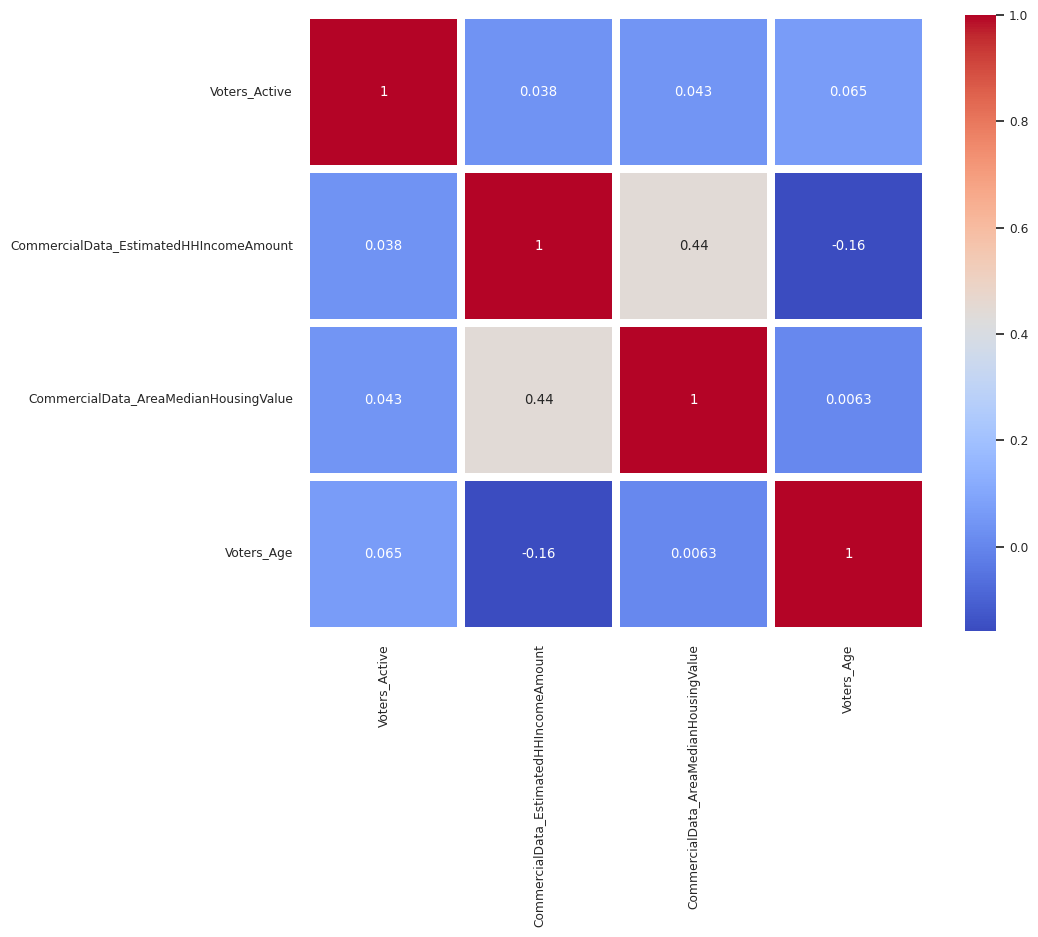

In [65]:
# Possible Corr Matrix
#transformed_data = fitted_pipeline.transform(spark_train)
fig, ax = plt.subplots(figsize=(10, 8))
# Convert the transformed data to a pandas dataframe for correlation matrix calculation
corr_df = lr_test_predictions.select([c for c in lr_test_predictions.columns if c in numerical_columns + [col+"_vec" for col in categorical_columns]]).toPandas()

# Calculate correlation matrix
corr = corr_df.corr()

# Create heatmap visualization with seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=4.5)

# Show the plot
plt.show()

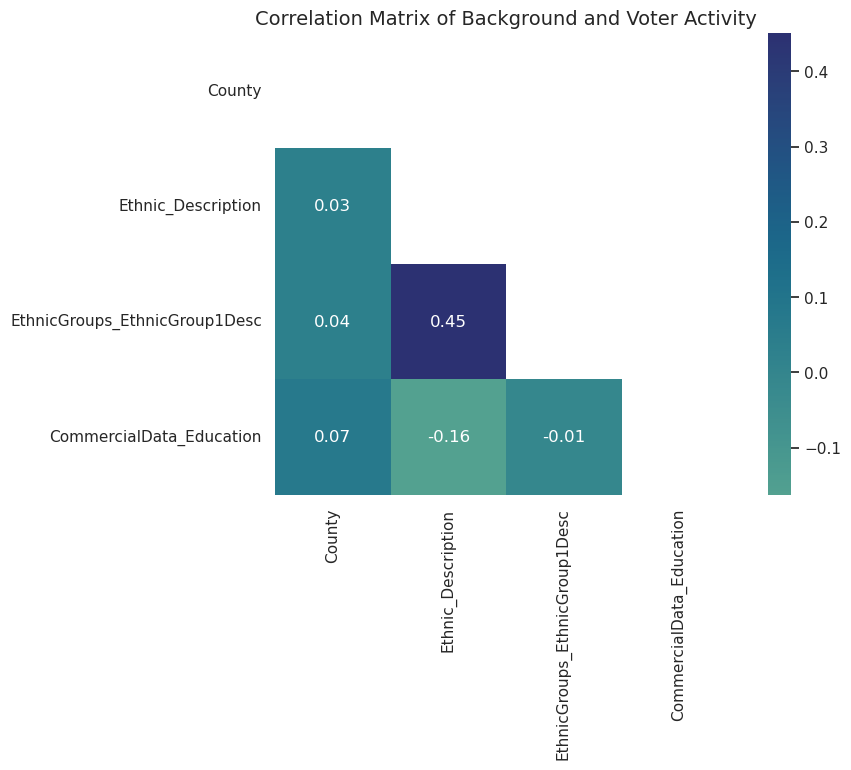

In [74]:
# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Create a heatmap
sns.set(style='white')

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, cmap='crest', center=0, square=True, annot=True, annot_kws={"size": 12}, fmt=".2f")
plt.title('Correlation Matrix of Background and Voter Activity', fontsize=14)

plt.show()

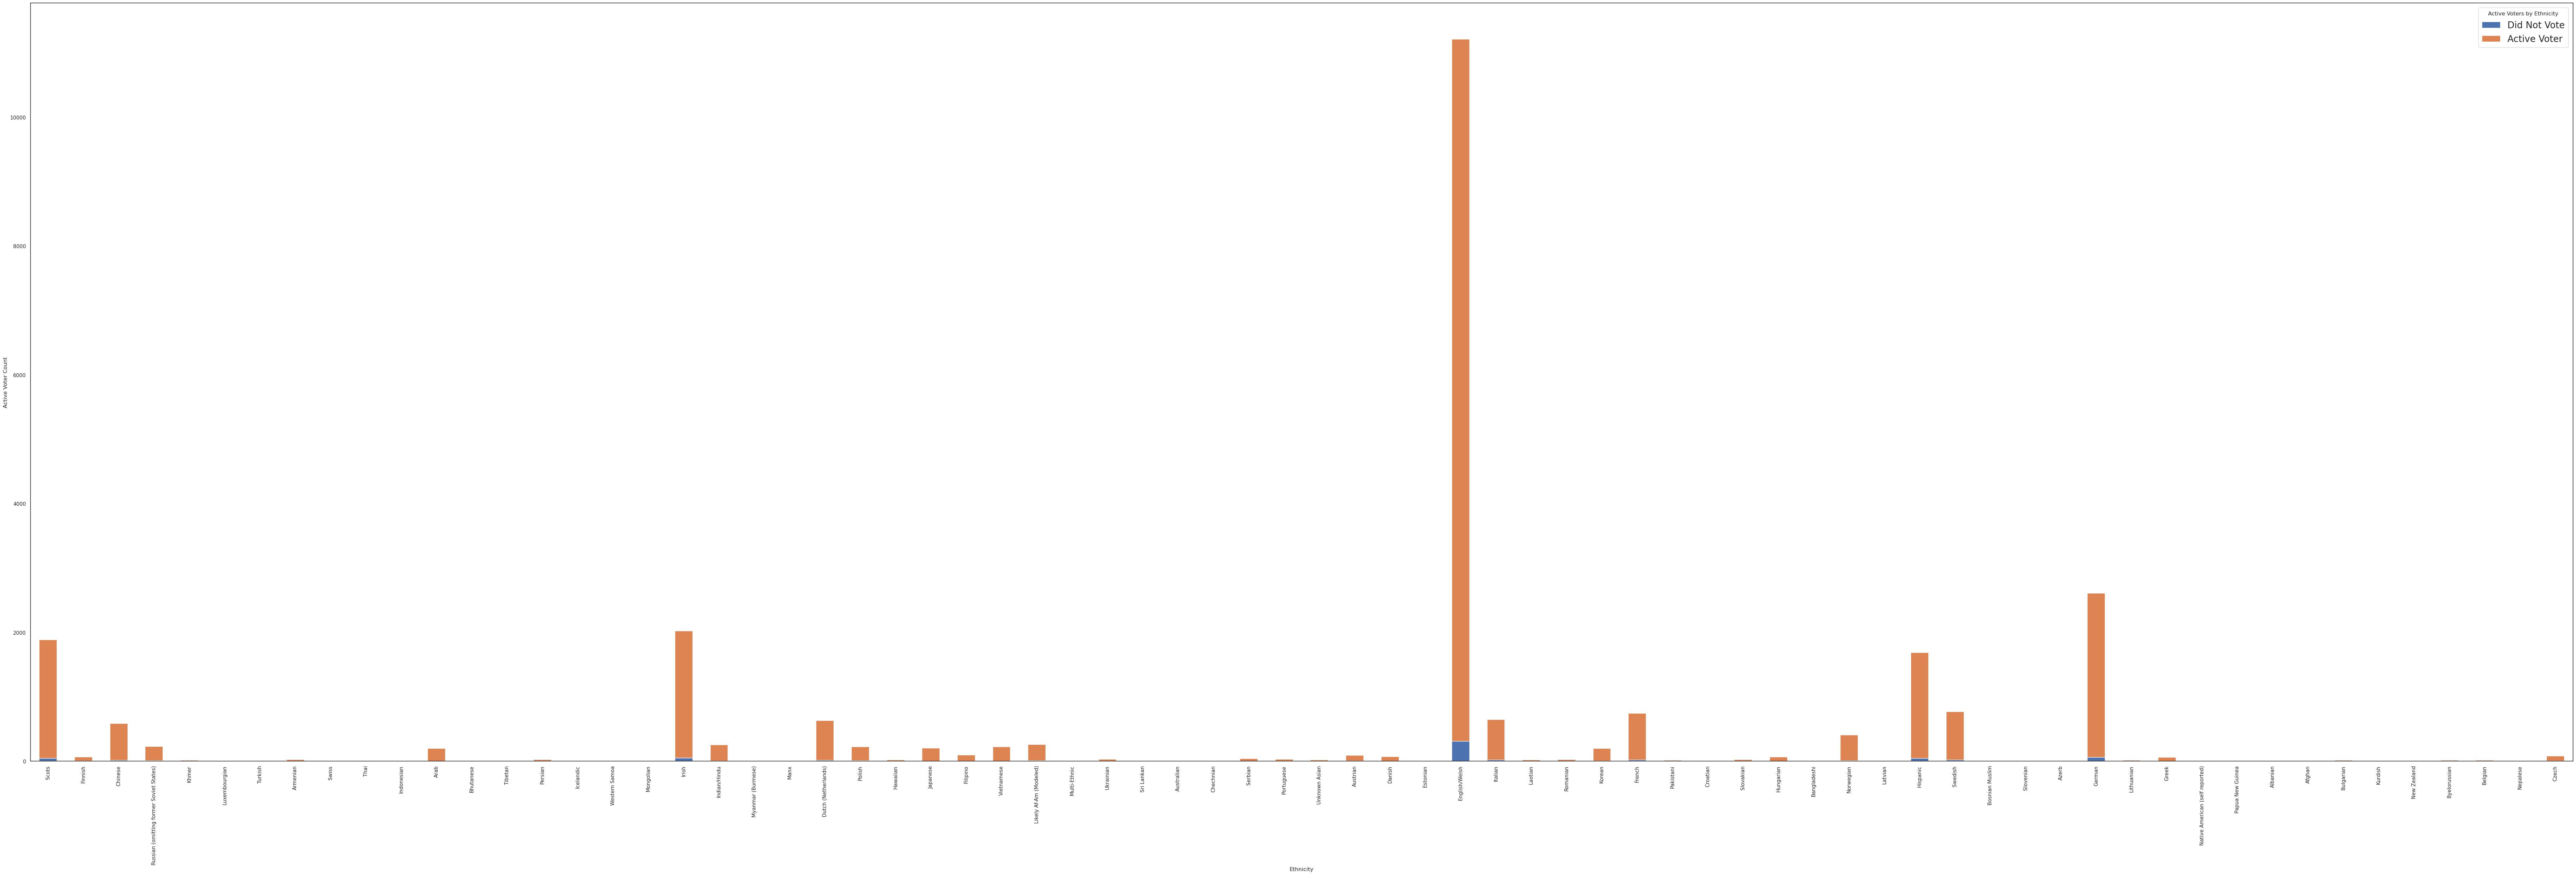

In [70]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Group the data by ethnicity and voters_active
grouped = sampled_df.groupBy('Ethnic_Description', 'Voters_Active').count()

# Pivot the data to create a count of voters for each ethnicity and active status combination
pivoted = grouped.groupBy('Ethnic_Description').pivot('Voters_Active').sum('count').fillna(0)

# Convert to Pandas DataFrame for plotting and set the index to Ethnic_Description
pandas_df = pivoted.toPandas().set_index('Ethnic_Description')

# Plot the data
pandas_df.plot(kind='bar', stacked=True)
plt.legend(["Did Not Vote", "Active Voter"],loc='center left', bbox_to_anchor=(1, 0.5), fontsize="20", title='Active Voters by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Active Voter Count')
plt.show()

> **Active Voters by Ethnicity(Zoom in to see ethnicity）** :The graph displays that individuals with a European background had the highest voter turnout by a considerable margin. Individuals of Hispanic background also exhibited significant voter turnout. Moreover, individuals with an Asian background demonstrated a comparatively high active voter rate, albeit at a lower level due to the limited representation of Asians in our dataset. Notably, there is a lack of voting data for many ethnicities. Our findings may be attributed to the fact that the state of Washington has a majority White population.

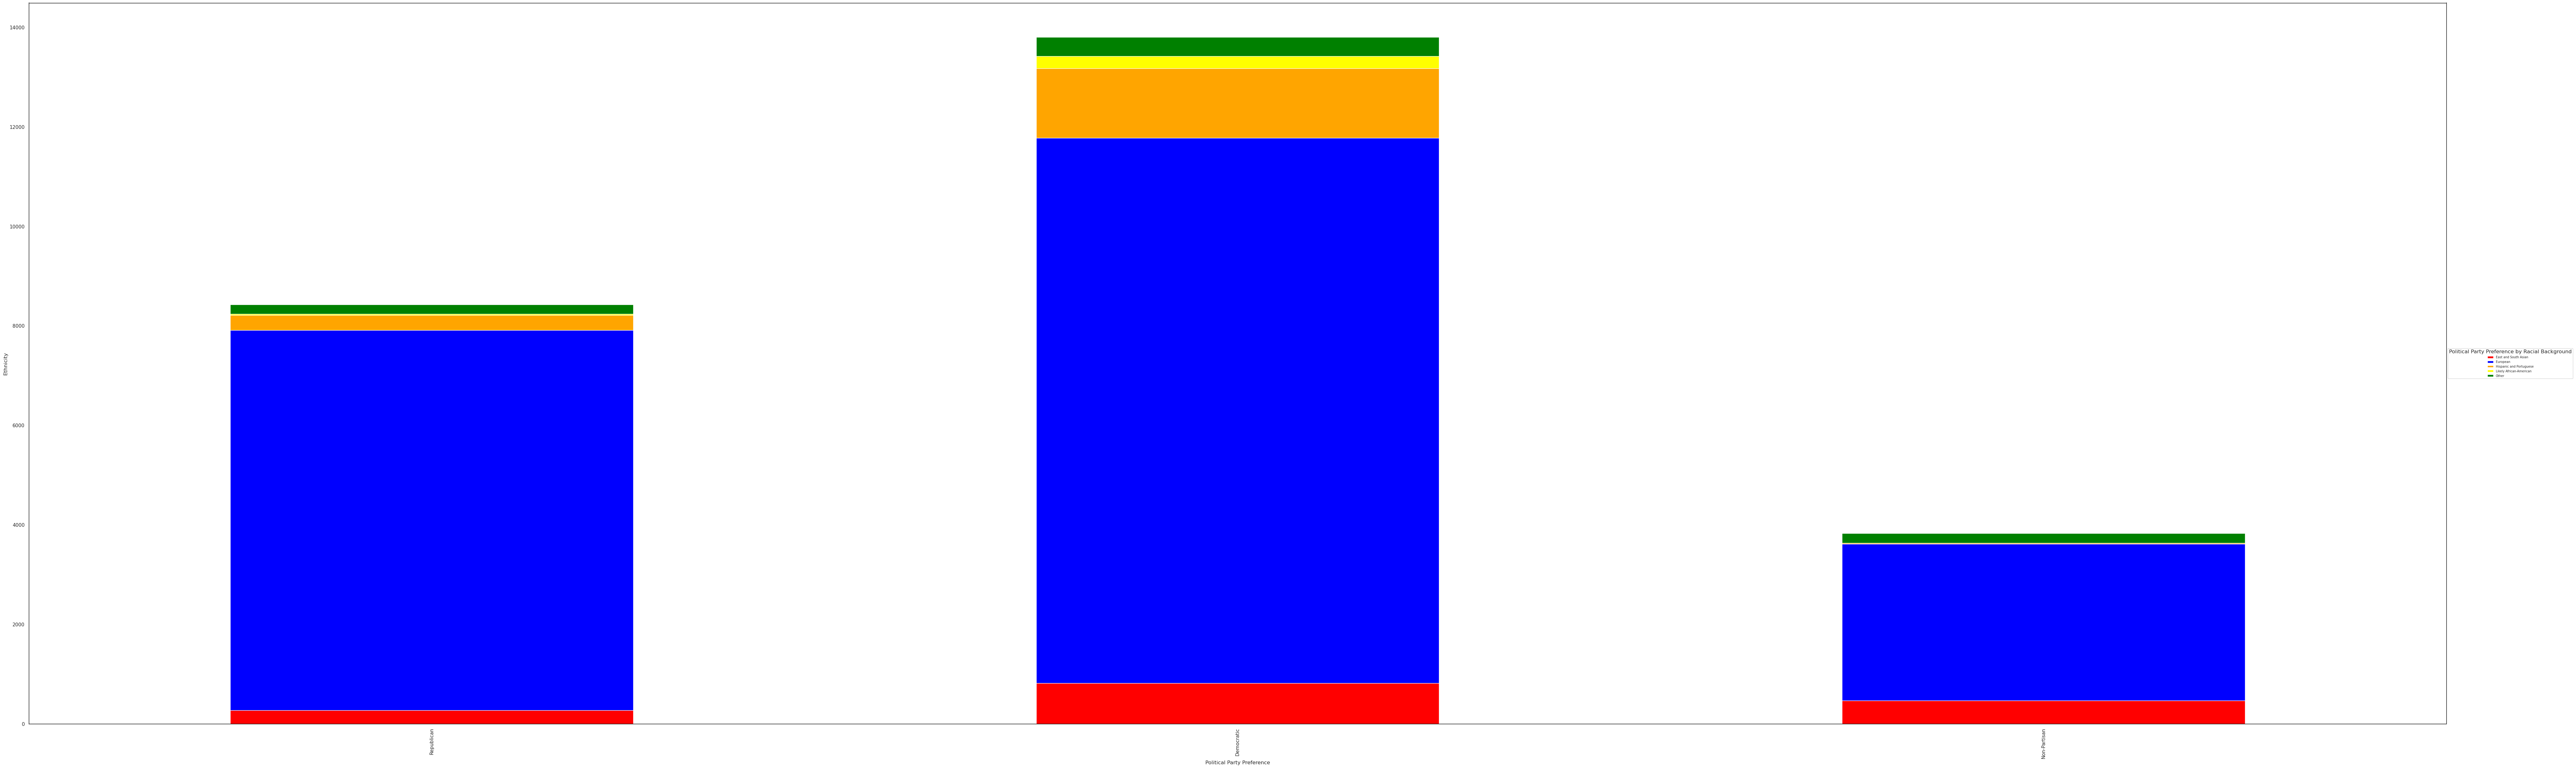

In [71]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Group the data by ethnicity and voters_active
grouped = sampled_df.groupBy('Parties_Description', 'EthnicGroups_EthnicGroup1Desc').count()

# Pivot the data to create a count of voters for each ethnicity and active status combination
pivoted = grouped.groupBy('Parties_Description').pivot('EthnicGroups_EthnicGroup1Desc').sum('count').fillna(0)

# Convert to Pandas DataFrame for plotting and set the index to Ethnic_Description
pandas_df = pivoted.toPandas().set_index('Parties_Description')

# Plot the data
pandas_df.plot(kind='bar', stacked=True, color=['red', 'blue', 'orange', 'yellow', 'green'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="7", title='Political Party Preference by Racial Background') # ["Republican", "Democratic", "Non-Partisan", "Libertarian", "Green"],
plt.ylabel('Ethnicity')
plt.xlabel('Political Party Preference')
plt.show()

> **Political Party Preference by Racial Background (Zoom in for detail)** :The prevalence of Democratic voters in Washington State is substantial, largely due to the state's Democratic leanings. In terms of ethnic affiliations, all groups demonstrate a certain degree of support for Democratic candidates, with Republican voters predominantly comprising those of European descent. Interestingly, minority voters are more inclined towards the Democratic party, with fewer affiliating as Non-Partisan voters. In contrast, Non-Partisan voters are primarily composed of individuals of European and Asian descent. Strikingly, individuals of Asian descent tend to support all three parties, demonstrating a diverse political outlook. It is worth noting that the Republican party is renowned for its high turnout rate, a trend that aligns with the party's primary demographic, individuals of European descent, who also exhibit the highest turnout rate among all ethnic groups.

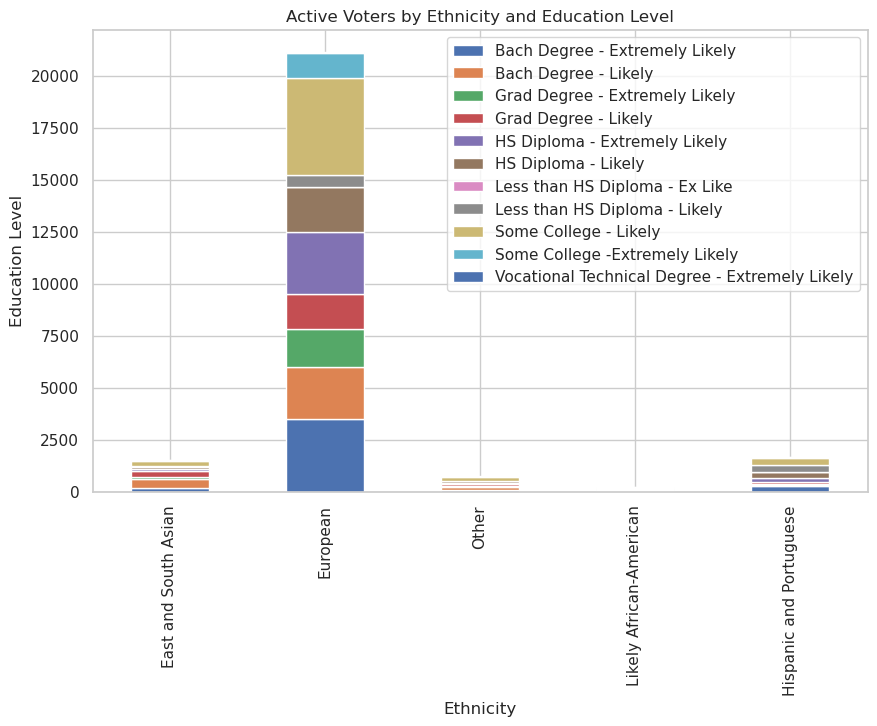

In [75]:
from pyspark.sql.functions import sum, col
import seaborn as sns
import matplotlib.pyplot as plt

# Group by ethnicity and education level and count active voters
df_grouped = sampled_df.groupBy('EthnicGroups_EthnicGroup1Desc', 'CommercialData_Education') \
                       .agg(sum('Voters_Active').alias('total_active_voters'))

# Pivot the data to create a stacked bar chart
df_pivot = df_grouped.groupBy('EthnicGroups_EthnicGroup1Desc') \
                     .pivot('CommercialData_Education') \
                     .sum('total_active_voters') \
                     .fillna(0)

# Convert Spark DataFrame to Pandas DataFrame for plotting with Seaborn
# df_pandas_2 = df_pivot.toPandas()
# Convert to Pandas DataFrame for plotting and set the index to Ethnic_Description
pandas_df = df_pivot.toPandas().set_index('EthnicGroups_EthnicGroup1Desc')

# Create the stacked bar chart using Seaborn
sns.set(style='whitegrid')
ax = pandas_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Active Voters by Ethnicity and Education Level')
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Education Level')
plt.show() 

> **Active Voters by Ethnicity and Education Level** :Typically, people with higher levels of education are more likely to vote. This holds true for Asians, who have high voter turnout rates that match their educational achievements. Hispanics also have a good turnout, but tend to have lower levels of education. It's interesting that despite having more people with lower education levels, Caucasian individuals still have a high voter turnout rate. This suggests that ethnicity may not be a major factor in determining whether someone votes or not. However, we don't have enough data from minority groups to say for sure. In particular, there isn't much information available about the education levels of African Americans.

In [ ]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Group the data by ethnicity and voters_active
grouped = sampled_df.groupBy('EthnicGroups_EthnicGroup1Desc', 'CommercialData_Education').count()

# Pivot the data to create a count of voters for each ethnicity and active status combination
pivoted = grouped.groupBy('EthnicGroups_EthnicGroup1Desc').pivot('CommercialData_Education').sum('count').fillna(0)

# Convert to Pandas DataFrame for plotting and set the index to Ethnic_Description
pandas_df = pivoted.toPandas().set_index('EthnicGroups_EthnicGroup1Desc')

# Plot the data
pandas_df.plot(kind='bar', stacked=True)
plt.legend(fontsize="7", title='Education Disparity Across Ethnicity', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Ethnicity')
plt.ylabel('Education Level')
plt.show()

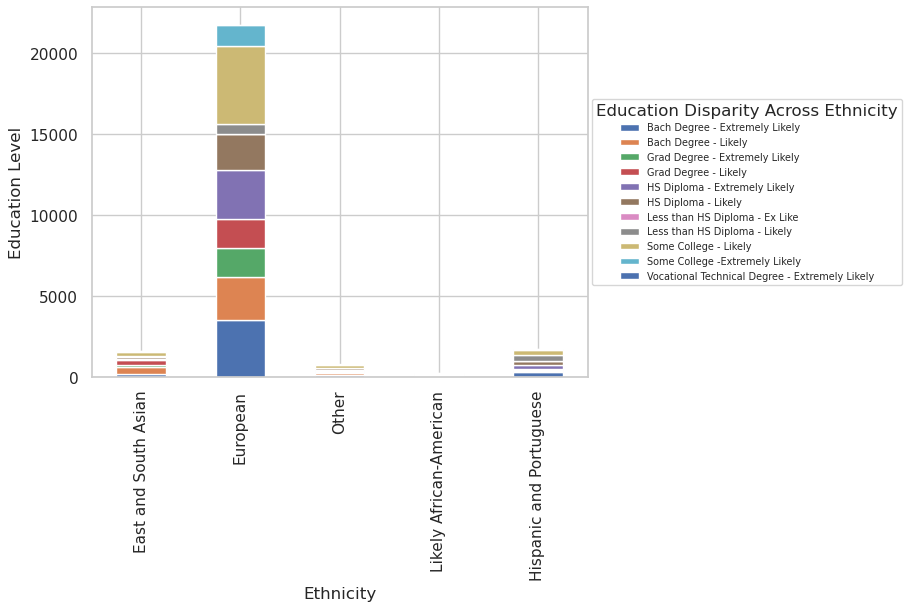

> **Education Disparity Across Ethnicities** :This graph largely echoes the educational trends we observed in the preceding graph.

### Analysis:

Our data visualizations reveal that individuals of European background had the highest voter turnout by a considerable margin in Washington State. Those of Hispanic background also showed significant voter turnout, while those of Asian background exhibited a comparatively high active voter rate, albeit at a lower level due to their limited representation in our dataset. We found that the state's majority White population could account for these trends.Surprisingly, income did not appear to play a significant role in preventing different ethnic groups from voting. However, we noticed a strong pattern in voter turnout among individuals residing in more prosperous neighborhoods. This association can be attributed to the fact that European and Asian populations are more likely to live in affluent areas, while Black and Hispanic populations tend to reside in median to lower valued housing areas, which may explain their comparatively lower voting rate.
Our exploratory data analysis also showed a slight correlation between voting and having a higher education level.Our logistic regression model highlighted that a person's housing area value had the strongest influence on their likelihood to vote, with a score of 0.33.Overall, our findings suggest that people who live in higher-valued neighborhoods are more likely to vote, which aligns with the strong active voting rates among individuals of European and Asian descent living in the most affluent areas. Additionally, our correlation plot indicates that our features are not strongly correlated with each other.

# Conclusion:

In summary, the analysis of the data from three different lenses of study suggests that there are particular interests and lifestyle habits, ethnic background and levels of education, and housing values and income that may have an impact on voter turnout in Washington State.

Individuals with interests in culinary, travel, and photography were found to be more likely to participate in elections. Voters interested in the casino and photography or casino and auto racing were also relatively more likely to vote. 

These hobbies generally require investment of resources and money, which plays true to the next narrative of a different research lens - these following variables all have positive correlation with voting turnout - state income decile, area median income and area housing value. 

The research also found that ethnic background and housing area value were significant predictors of voter turnout, with individuals of European and Asian descent and those residing in more affluent areas having higher rates of voting activity. On the other hand, black and Hispanic populations are heavily concentrated in median to lower valued housing areas, which is linked to their comparatively lower voting rate. Lastly, a higher level of education showed a slight correlation with voter turnout.